**Part1(10marks)**


Consider the dataset “advertising.csv”. Sales are proposed to be enhanced with advertisement in
TV, Radio and Newspaper. 

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
q1 = pd.read_csv('/content/advertising.csv')

In [76]:
q1.head()

Unnamed: 0  Unnamed: 0.1     TV  Radio  Newspaper  Sales
0           0             1  230.1   37.8       69.2   22.1
1           1             2   44.5   39.3       45.1   10.4
2           2             3   17.2   45.9       69.3    9.3
3           3             4  151.5   41.3       58.5   18.5
4           4             5  180.8   10.8       58.4   12.9

In [77]:
q1.pop('Unnamed: 0')

0        0
1        1
2        2
3        3
4        4
      ... 
195    195
196    196
197    197
198    198
199    199
Name: Unnamed: 0, Length: 200, dtype: int64

In [78]:
q1.pop('Unnamed: 0.1')

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: Unnamed: 0.1, Length: 200, dtype: int64

In [79]:
q1.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

1. Draw 

(a) a scatter plot of money spent on TV advertisements versus sales 

(b) Pair plots and
Heatmap.

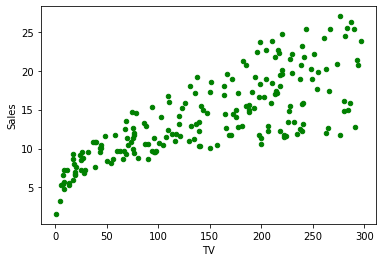

In [80]:
sc = q1.plot.scatter(x='TV', y='Sales',c='Green')

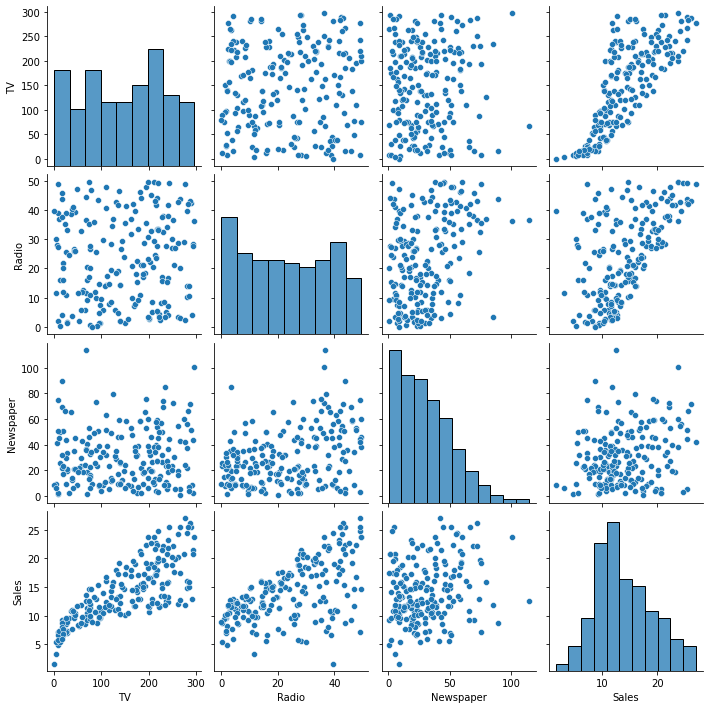

In [81]:
sns.pairplot(q1)

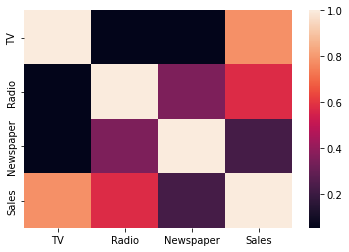

In [82]:
sns.heatmap(q1.corr())

2. Develop a Linear Regression model based on money spent on TV advertisements versus Sales.

In [83]:
x = q1[['TV']]
y = q1[['Sales']]

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
le = LinearRegression()

In [86]:
le.fit(x,y)

LinearRegression()

In [87]:
print("The coefficient of Linear Regression is: ", le.coef_[0][0])

The coefficient of Linear Regression is:  0.04753664043301975


In [88]:
print("Intercepts of Linear Regression Model are: ", le.intercept_)

Intercepts of Linear Regression Model are:  [7.03259355]


3. With the regression line so developed, predict the sales that can be anticipated based on the
money spent on TV advertisements.

In [89]:
y_pred = le.predict(x) 

4. Draw the Regression Line superimposing on the data

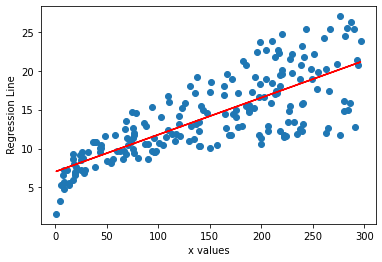

In [90]:
plt.scatter(x, y)
plt.plot(x,y_pred, 'r')
plt.xlabel("x values")
plt.ylabel(" Regression Line")
plt.show()

5. Employ statsmodels.api and run an OLS regressor on the data. Plot the line of regression and
residuals employing libraries of statsmodel. Comment on the heteroscedasticity.

In [91]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

In [108]:
lm = ols('Sales ~ TV',data=ad).fit()

In [109]:
fig = plt.figure(figsize=(14, 8))

<Figure size 1008x576 with 0 Axes>

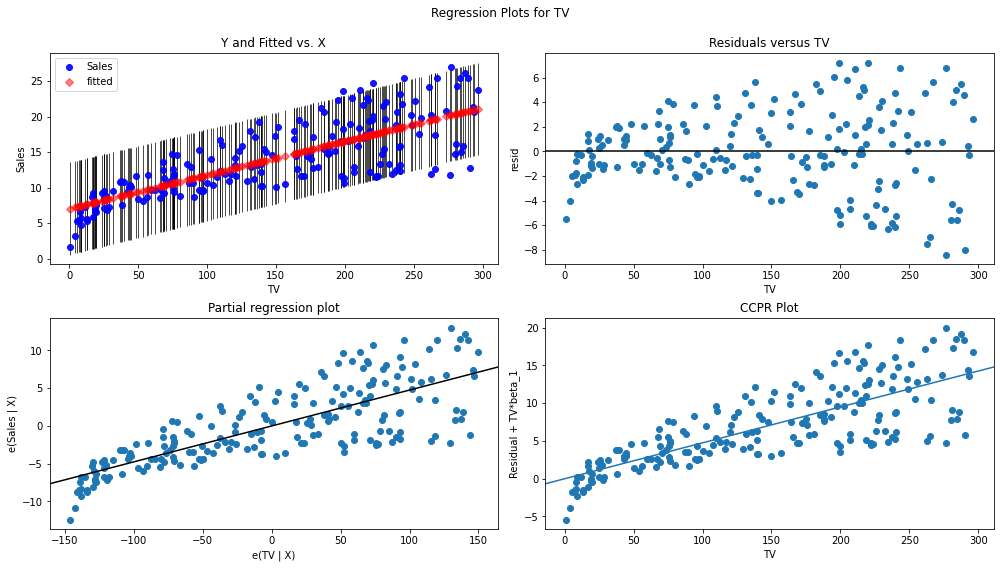

In [110]:
fig = sm.graphics.plot_regress_exog(lm, 'TV', fig=fig)
fig

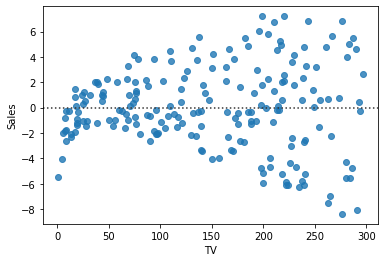

In [113]:
sns.residplot(x='TV', y='Sales', data=q1)
plt.show()

**Part2 (10marks).**
Consider the dataset "pima-indians-diabetes.csv". Label indicates the presence of diabetes(1) or
its absence(0).Objective is to prepare a KNN classifier for the dataset.



In [92]:
q2 = pd.read_csv('/content/pima-indians-diabetes.csv')

In [93]:
q2.describe()

6         148          72          35           0        33.6  \
count  767.000000  767.000000  767.000000  767.000000  767.000000  767.000000   
mean     3.842243  120.859192   69.101695   20.517601   79.903520   31.990482   
std      3.370877   31.978468   19.368155   15.954059  115.283105    7.889091   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   32.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  127.500000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

            0.627          50           1  
count  767.000000  767.000000  767.000000  
mean     0.471674   33.219035    0.348110  
std      0.331497   11.752296    0.476682  
min      0.078000   21.000000    0.000000  
25%      0.243500   24.000000    0.000000  
50%      0.371000   29.000000    0.000000  
75%      0.625000   41.000000    1.000000  
max      2.420000   81.000000    1.000000

In [94]:
q2.columns

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')

In [95]:
y = q2.pop('1')
x = q2

In [96]:
x.shape

(767, 8)

In [97]:
y.shape

(767,)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

2. Employ the standard scalar library and rescale the distribution of values so that the mean of
observed values is 0 and the standard deviation is 1.

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

3. Develop a KNN classifier model and predict for the test data.

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knn = KNeighborsClassifier(n_neighbors=5)

In [103]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [104]:
y_pred = knn.predict(x_test)

4. Draw up a confusion matrix.

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[81 16]
 [26 31]]


5. Identify an optimum k value based on minimum mean errors (consider a range of 20). Draw a
corresponding graph between Mean error and k-value.

In [106]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

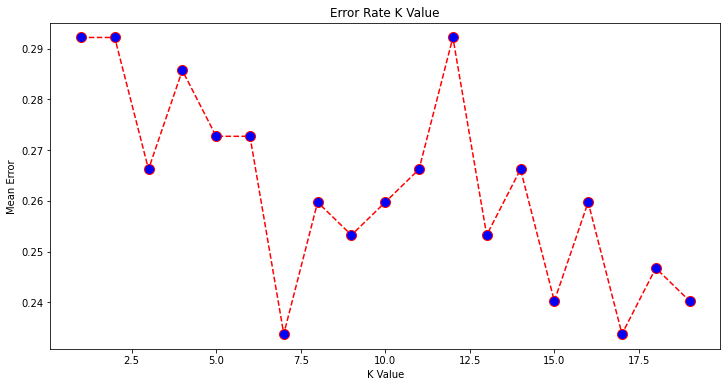

In [107]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')